# Module - 6

# Decision Tree Classifier

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=p.read_csv('demo1.csv')

In [4]:
df = data.dropna()

In [5]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [6]:
del df['time']
del df['updated']
del df['place']
del df['net']
del df['magSource']
del df['type']
del df['id']

In [7]:
df.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst',
       'status', 'locationSource'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['magType','status', 'locationSource']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(str)

In [9]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='status', axis=1)
#Response variable
y = df.loc[:,'status']    

In [10]:
'''We'll use a test size of 20%. We also stratify the split on the response variable,
which is very important to do because there are so few fraudulent transactions'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  5619
Number of test dataset:  1405
Total number of dataset:  7024


In [11]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dtree= DecisionTreeClassifier()

dtree.fit(X_train,y_train)

predictDT = dtree.predict(X_test)

print("")
print('Classification report of Decision Tree Results:')
print("")
print(classification_report(y_test,predictDT))

print("")
cm1=confusion_matrix(y_test,predictDT)
print('Confusion Matrix result of Decision Tree Classifier is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(dtree, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Decision Tree Classifier is:",accuracy.mean() * 100)
DT=accuracy.mean() * 100


Classification report of Decision Tree Results:

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       130
           1       0.98      0.97      0.98      1275

    accuracy                           0.96      1405
   macro avg       0.86      0.88      0.87      1405
weighted avg       0.96      0.96      0.96      1405


Confusion Matrix result of Decision Tree Classifier is:
 [[ 103   27]
 [  35 1240]]

Sensitivity :  0.7923076923076923

Specificity :  0.9725490196078431

Cross validation test results of accuracy:
[0.93879004 0.94733096 0.96441281 0.97153025 0.93447293]

Accuracy result of Decision Tree Classifier is: 95.13073982824872


In [13]:
def graph():
    import matplotlib.pyplot as plt
    data=[DT]
    alg="Decision Tree Classification"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison of Earth Quake",fontsize=15)
    plt.legend(b,data,fontsize=9)

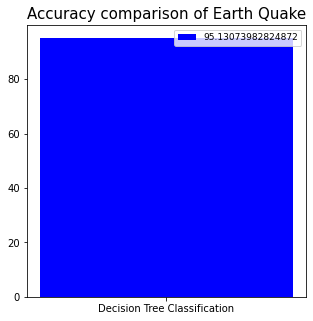

In [14]:
graph()

In [15]:
TP = cm1[0][0]
FP = cm1[1][0]
FN = cm1[1][1]
TN = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 103
True Negative : 27
False Positive : 35
False Negative : 1240

True Positive Rate : 0.0766939687267312
True Negative Rate : 0.43548387096774194
False Positive Rate : 0.5645161290322581
False Negative Rate : 0.9233060312732688

Positive Predictive Value : 0.7463768115942029
Negative predictive value : 0.021310181531176007


Confusion matrix-DecisionTreeClassifier:
[[ 103   27]
 [  35 1240]]


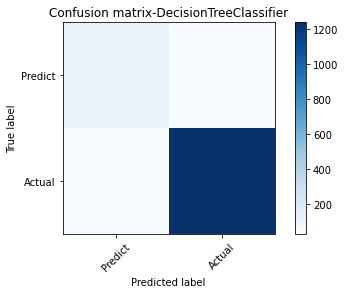

In [16]:
def plot_confusion_matrix(cm1, title='Confusion matrix-DecisionTreeClassifier', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm1=confusion_matrix(y_test, predictDT)
print('Confusion matrix-DecisionTreeClassifier:')
print(cm1)
plot_confusion_matrix(cm1)